# Exploration of Craigslist

# Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

# Obtain web data, including handling JSON
import requests

# Library for Craigslist
import craigslist

# Craigslist APIs

In [2]:
# Craigslist
# API description - https://www.craigslist.org/about/reference
# API endpoint - http://reference.craigslist.org
base_url = "http://reference.craigslist.org/"

# Areas: The list of areas and subareas for which a Craigslist site is established
areas_request = "Areas"

# Categories: The list of categories associated with entries on Craigslist
categories_request = "Categories"


## Explore Craigslist Areas

In [3]:
base_url + areas_request

'http://reference.craigslist.org/Areas'

In [4]:
# Get the list of Craiglist areas and subareas
response = requests.get(base_url + areas_request)

In [5]:
# Confirm that the web response code is OK
assert response.status_code == 200, "Return code NOK: {response.status_code}"

In [6]:
# Put the JSON results into a dictionary
area_list = response.json()
# pprint(area_list)

In [7]:
# Create dataframe of areas
areas_df = pd.DataFrame( area_list )

# Exclude the dictionaries in SubAreas since they will form a separate dataframe
areas_df.drop(columns=['SubAreas'], inplace=True)
areas_df

,Abbreviation,AreaID,Country,Description,Hostname,Latitude,Longitude,Region,ShortDescription,Timezone
0,sfo,1,US,SF bay area,sfbay,37.500000,-122.250000,CA,SF bay area,America/Los_Angeles
1,sea,2,US,seattle-tacoma,seattle,47.606400,-122.331001,WA,seattle,America/Los_Angeles
2,nyc,3,US,new york city,newyork,40.714199,-74.006401,NY,new york,America/New_York
3,bos,4,US,boston,boston,42.358299,-71.060303,MA,boston,America/New_York
4,lax,7,US,los angeles,losangeles,34.052200,-118.242996,CA,los angeles,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...
702,hnf,709,US,hanford-corcoran,hanford,36.327400,-119.646004,CA,hanford,America/Los_Angeles
703,smx,710,US,"santa maria, CA",santamaria,34.963799,-120.433296,CA,santa maria,America/Los_Angeles
704,okv,711,US,"winchester, VA",winchester,39.178299,-78.166603,VA,winchester,America/New_York
705,vaw,712,US,southwest VA,swva,36.892803,-82.084351,VA,southwest VA,America/New_York


In [8]:
# Create a dataframe of subareas that are correlated to Area IDs
subareas_df = pd.DataFrame()
i=0
for a in area_list:
    d_text  = f"Area [{a['AreaID']}]: {a['Description']} => "

    # Check for subareas
    if 'SubAreas' in a.keys():
          
        # For this specific area, create a temp dataframe of subareas
        # based upon the dictionary specified in the SubAreas column
        temp_df = pd.Series(a['SubAreas']).apply(pd.Series)

        # Add the AreaID for this area to each of the subareas in the temp dataframe
        temp_df['AreaID'] = a['AreaID']

        # Append this temp dataframe to the dataframe of subareas
        subareas_df = subareas_df.append( temp_df, ignore_index=True)
        
        # Add a note to the debug text
        d_text += f"{len(temp_df)} Subareas processed"
        
    else:
        # There are no subareas for this specific area
        d_text += f"No Subareas"

    # print(d_text)

In [9]:
subareas_df

,Abbreviation,Description,ShortDescription,SubAreaID,AreaID
0,sfc,city of san francisco,san francisco,1,1
1,sby,south bay area,south bay,2,1
2,eby,east bay area,east bay,3,1
3,pen,peninsula,peninsula,4,1
4,nby,north bay / marin,north bay,5,1
...,...,...,...,...,...
98,psc,pasco co,pasco co,3,37
99,pnl,pinellas co,pinellas co,4,37
100,lee,lee county,lee county,1,125
101,chl,charlotte county,charlotte co,2,125


In [10]:
area_info_df = areas_df.merge(subareas_df, on='AreaID', how='left', suffixes=('_Area', '_SubArea') )

In [11]:
area_info_df = area_info_df[ [
        'AreaID', 'Abbreviation_Area', 'ShortDescription_Area', 'Description_Area',
        'Hostname', 'Region',  'Country', 'Latitude', 'Longitude', 'Timezone',
        'SubAreaID', 'Abbreviation_SubArea', 'ShortDescription_SubArea', 'Description_SubArea'
        ] ]
area_info_df

,AreaID,Abbreviation_Area,ShortDescription_Area,Description_Area,Hostname,Region,Country,Latitude,Longitude,Timezone,SubAreaID,Abbreviation_SubArea,ShortDescription_SubArea,Description_SubArea
0,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,1.0,sfc,san francisco,city of san francisco
1,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,2.0,sby,south bay,south bay area
2,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,3.0,eby,east bay,east bay area
3,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,4.0,pen,peninsula,peninsula
4,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,5.0,nby,north bay,north bay / marin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,709,hnf,hanford,hanford-corcoran,hanford,CA,US,36.327400,-119.646004,America/Los_Angeles,NaN,NaN,NaN,NaN
786,710,smx,santa maria,"santa maria, CA",santamaria,CA,US,34.963799,-120.433296,America/Los_Angeles,NaN,NaN,NaN,NaN
787,711,okv,winchester,"winchester, VA",winchester,VA,US,39.178299,-78.166603,America/New_York,NaN,NaN,NaN,NaN
788,712,vaw,southwest VA,southwest VA,swva,VA,US,36.892803,-82.084351,America/New_York,NaN,NaN,NaN,NaN


## Explore Craigslist Categories

In [12]:
base_url + categories_request

'http://reference.craigslist.org/Categories'

In [13]:
# Get the list of Craiglist areas and subareas
response = requests.get(base_url + categories_request)

In [14]:
# Confirm that the web response code is OK
assert response.status_code == 200, "Return code NOK: {response.status_code}"

In [15]:
# Put the JSON results into a dictionary
cat_list = response.json()
# pprint(cat_list)

In [16]:
# Create dataframe of Categories
cat_df = pd.DataFrame( cat_list )
# cat_df

In [17]:
# Create a dictionary of Category Types (based upon reference page info)
cat_type_dict = {
    'B': 'Services',
    'C': 'Community',
    'E': 'Events',
    'G': 'Gigs',
    'H': 'Housing',
    'J': 'Jobs',
    'P': 'Personals',
    'R': 'Resumes',
    'S': 'For Sale / Wanted',
    'L': 'TBD'
}

In [18]:
cat_df['Type_Definition'] = cat_df['Type'].apply(lambda x: cat_type_dict[x] if x in cat_type_dict.keys() else None)
cat_df

,Abbreviation,CategoryID,Description,Type,Type_Definition
0,apa,1,apts/housing for rent,H,Housing
1,hou,2,wanted: apts,H,Housing
2,com,3,general community,C,Community
3,biz,4,small biz ads,B,Services
4,for,5,general for sale - by owner,S,For Sale / Wanted
...,...,...,...,...,...
175,tro,205,trailers - by owner,S,For Sale / Wanted
176,trb,206,trailers - by dealer,S,For Sale / Wanted
177,cms,207,cell phone / mobile services,B,Services
178,avo,208,aviation - by owner,S,For Sale / Wanted


In [19]:
# No idea what category type = 'L' is for, so made it 'TBD'
cat_df[ cat_df['Type']=='L' ]

,Abbreviation,CategoryID,Description,Type,Type_Definition
48,cal,66,event calendar,L,TBD


# Searches on Craigslist

In [20]:
# Craigslist search: http://YOURCITY.craigslist.org/search/sss?format=rss&query=SearchString
# This returns a rss/xml file

In [21]:
# Instead, use the craigslist library to perform the search, for example:
# craigslist.search(
#     area,
#     category,
#     type_="jsonsearch",
#     get_detailed_posts=False,
#     cache=True,
#     cachedir=os.path.expanduser('~'),
#     executor=None,
#     executor_class='concurrent.futures.ThreadPoolExecutor',
#     max_workers=None,
#     get=requests_get,
#     **kwargs):

In [22]:
# Search for apartments in Chicago within 1 mile(?) of postal code 60661
search_generator = craigslist.search(area='chicago', category='apa', postal=60661, search_distance=1,
                                      get_detailed_posts=True, limit=1 )

In [23]:
i=0
p_list = []
for p in search_generator:
    p_list.append( dict( p._asdict() ) )
    i += 1
    if i>100: break

post_df = pd.DataFrame( p_list )
post_df

,id,repost_id,url,full_title,short_title,hood,num_bedrooms,sqftage,price,body_html,body_text,address,available_date
0,7007855615,None,https://chicago.craigslist.org/chc/apa/d/chica...,$1677 Brand New Studio in South Loop! Lease up...,Brand New Studio in South Loop! Lease up! In-u...,Chicago - South Loop,NaN,NaN,1677,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 115504620Rent: 1677 / Month...,South Wells near Polk,None
1,7006440536,None,https://chicago.craigslist.org/chc/apa/d/chica...,$1750 / 1br - Amazing 1 bed in Fulton River w...,Amazing 1 bed in Fulton River w Great Views an...,Chicago - Fulton River District,1.0,NaN,1750,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 9049569Rent: 1750 / MonthBe...,North Des Plaines St near Fulton,None
2,7004840465,6925291786,https://chicago.craigslist.org/chc/apa/d/chica...,"$3310 / 1br - 895ft2 - Massive 1 Bed, 895 Sq ...","Massive 1 Bed, 895 Sq Feet, 1 MONTH FREE, Stun...",River North / Old Town / Gold Coast,1.0,895.0,3310,"<section id=""postingbody"">\n <br>\n<br>...",Stunning chef's kitchen; custom stone countert...,None,2019-10-22
3,7007224782,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2250 / 2br - 1200ft2 - Luxury Lofts Availabl...,Luxury Lofts Available for rent! Contact Us NO...,Chicago,2.0,1200.0,2250,"<section id=""postingbody"">\n <br>\nRent...",Rent: $2250\nBeds: 2\nBath: 2\nAvailable Date:...,S Dearborn St.,2019-11-01
4,7009561889,None,https://chicago.craigslist.org/chc/apa/d/chica...,"$2095 / 1br - 750ft2 - 1 Bd on West Grand, Ha...","1 Bd on West Grand, Hardwood Floors, Furnished...",Chicago - West Loop,1.0,750.0,2095,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 184284042Rent: 2095 / Month...,645 West Grand,2019-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7012705471,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2595 / 1br - First class new construction,First class new construction,West Loop,1.0,NaN,2595,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 129314294Rent: 2595 / Month...,West Madison,2019-11-03
97,7005590988,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2600 / 1br - 900ft2 - Fantastic 1bed/1bath+D...,Fantastic 1bed/1bath+Den in the Emerald Towers...,Chicago-West Loop,1.0,900.0,2600,"<section id=""postingbody"">\n <br>\nUnit...",Unit Features:\n\nONE BEDROOM + DEN IN W/ AMAZ...,125 S. Green Street,2019-12-01
98,7005915714,6979828575,https://chicago.craigslist.org/chc/apa/d/chica...,$3590 / 2br - 1200ft2 - Furnished Sleek West ...,"Furnished Sleek West Loop w/ Gym, Pool, W/D, n...",West Loop/ Chicago,2.0,1200.0,3590,"<section id=""postingbody"">\n <br>\n<br>...","12+ month lease: $3,990* / mo\n6 to 12 month l...",180 N Jefferson Street,2019-12-01
99,7012695921,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2280 / 1br - 800ft2 - Luxury West Loop 1 br ...,Luxury West Loop 1 br with parking included,West Loop,1.0,800.0,2280,"<section id=""postingbody"">\n <br>\n<br>...","Unit features soaring 9' ceilings, south-facin...",Green near Monroe,2019-11-15


In [24]:
post_df

,id,repost_id,url,full_title,short_title,hood,num_bedrooms,sqftage,price,body_html,body_text,address,available_date
0,7007855615,None,https://chicago.craigslist.org/chc/apa/d/chica...,$1677 Brand New Studio in South Loop! Lease up...,Brand New Studio in South Loop! Lease up! In-u...,Chicago - South Loop,NaN,NaN,1677,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 115504620Rent: 1677 / Month...,South Wells near Polk,None
1,7006440536,None,https://chicago.craigslist.org/chc/apa/d/chica...,$1750 / 1br - Amazing 1 bed in Fulton River w...,Amazing 1 bed in Fulton River w Great Views an...,Chicago - Fulton River District,1.0,NaN,1750,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 9049569Rent: 1750 / MonthBe...,North Des Plaines St near Fulton,None
2,7004840465,6925291786,https://chicago.craigslist.org/chc/apa/d/chica...,"$3310 / 1br - 895ft2 - Massive 1 Bed, 895 Sq ...","Massive 1 Bed, 895 Sq Feet, 1 MONTH FREE, Stun...",River North / Old Town / Gold Coast,1.0,895.0,3310,"<section id=""postingbody"">\n <br>\n<br>...",Stunning chef's kitchen; custom stone countert...,None,2019-10-22
3,7007224782,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2250 / 2br - 1200ft2 - Luxury Lofts Availabl...,Luxury Lofts Available for rent! Contact Us NO...,Chicago,2.0,1200.0,2250,"<section id=""postingbody"">\n <br>\nRent...",Rent: $2250\nBeds: 2\nBath: 2\nAvailable Date:...,S Dearborn St.,2019-11-01
4,7009561889,None,https://chicago.craigslist.org/chc/apa/d/chica...,"$2095 / 1br - 750ft2 - 1 Bd on West Grand, Ha...","1 Bd on West Grand, Hardwood Floors, Furnished...",Chicago - West Loop,1.0,750.0,2095,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 184284042Rent: 2095 / Month...,645 West Grand,2019-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7012705471,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2595 / 1br - First class new construction,First class new construction,West Loop,1.0,NaN,2595,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 129314294Rent: 2595 / Month...,West Madison,2019-11-03
97,7005590988,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2600 / 1br - 900ft2 - Fantastic 1bed/1bath+D...,Fantastic 1bed/1bath+Den in the Emerald Towers...,Chicago-West Loop,1.0,900.0,2600,"<section id=""postingbody"">\n <br>\nUnit...",Unit Features:\n\nONE BEDROOM + DEN IN W/ AMAZ...,125 S. Green Street,2019-12-01
98,7005915714,6979828575,https://chicago.craigslist.org/chc/apa/d/chica...,$3590 / 2br - 1200ft2 - Furnished Sleek West ...,"Furnished Sleek West Loop w/ Gym, Pool, W/D, n...",West Loop/ Chicago,2.0,1200.0,3590,"<section id=""postingbody"">\n <br>\n<br>...","12+ month lease: $3,990* / mo\n6 to 12 month l...",180 N Jefferson Street,2019-12-01
99,7012695921,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2280 / 1br - 800ft2 - Luxury West Loop 1 br ...,Luxury West Loop 1 br with parking included,West Loop,1.0,800.0,2280,"<section id=""postingbody"">\n <br>\n<br>...","Unit features soaring 9' ceilings, south-facin...",Green near Monroe,2019-11-15


In [25]:
# post_df.dtypes

In [26]:
post_df['body_text'].apply(len).describe()

count     101.000000
mean     1255.742574
std       725.051911
min         0.000000
25%       695.000000
50%      1276.000000
75%      1643.000000
max      2779.000000
Name: body_text, dtype: float64

In [27]:
# Get all of the words in the body_text
post_df['word_list'] = post_df['body_text'].apply(str.lower).apply(str.split).apply(sorted)
post_df

,id,repost_id,url,full_title,short_title,hood,num_bedrooms,sqftage,price,body_html,body_text,address,available_date,word_list
0,7007855615,None,https://chicago.craigslist.org/chc/apa/d/chica...,$1677 Brand New Studio in South Loop! Lease up...,Brand New Studio in South Loop! Lease up! In-u...,Chicago - South Loop,NaN,NaN,1677,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 115504620Rent: 1677 / Month...,South Wells near Polk,None,"[#481.011892), (just, (some, (weight, -broker,..."
1,7006440536,None,https://chicago.craigslist.org/chc/apa/d/chica...,$1750 / 1br - Amazing 1 bed in Fulton River w...,Amazing 1 bed in Fulton River w Great Views an...,Chicago - Fulton River District,1.0,NaN,1750,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 9049569Rent: 1750 / MonthBe...,North Des Plaines St near Fulton,None,"[#481.011892), (dog, (if,, (just, (weight, -br..."
2,7004840465,6925291786,https://chicago.craigslist.org/chc/apa/d/chica...,"$3310 / 1br - 895ft2 - Massive 1 Bed, 895 Sq ...","Massive 1 Bed, 895 Sq Feet, 1 MONTH FREE, Stun...",River North / Old Town / Gold Coast,1.0,895.0,3310,"<section id=""postingbody"">\n <br>\n<br>...",Stunning chef's kitchen; custom stone countert...,None,2019-10-22,"[(and, +, +, +, +, +, -, -, --, --, --, --, 10..."
3,7007224782,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2250 / 2br - 1200ft2 - Luxury Lofts Availabl...,Luxury Lofts Available for rent! Contact Us NO...,Chicago,2.0,1200.0,2250,"<section id=""postingbody"">\n <br>\nRent...",Rent: $2250\nBeds: 2\nBath: 2\nAvailable Date:...,S Dearborn St.,2019-11-01,"[$2,250, $2250, $65, &, -, -, -, -, -, 1, 108t..."
4,7009561889,None,https://chicago.craigslist.org/chc/apa/d/chica...,"$2095 / 1br - 750ft2 - 1 Bd on West Grand, Ha...","1 Bd on West Grand, Hardwood Floors, Furnished...",Chicago - West Loop,1.0,750.0,2095,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 184284042Rent: 2095 / Month...,645 West Grand,2019-10-29,"[$100/month., /, 1, 1, 1, 184284042rent:, 1ava..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7012705471,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2595 / 1br - First class new construction,First class new construction,West Loop,1.0,NaN,2595,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 129314294Rent: 2595 / Month...,West Madison,2019-11-03,"[(garage), *pricing, /, 129314294rent:, 1avail..."
97,7005590988,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2600 / 1br - 900ft2 - Fantastic 1bed/1bath+D...,Fantastic 1bed/1bath+Den in the Emerald Towers...,Chicago-West Loop,1.0,900.0,2600,"<section id=""postingbody"">\n <br>\nUnit...",Unit Features:\n\nONE BEDROOM + DEN IN W/ AMAZ...,125 S. Green Street,2019-12-01,"[$200, +, -, -, 12/1, 13'', 2, 60647, 7x10, a/..."
98,7005915714,6979828575,https://chicago.craigslist.org/chc/apa/d/chica...,$3590 / 2br - 1200ft2 - Furnished Sleek West ...,"Furnished Sleek West Loop w/ Gym, Pool, W/D, n...",West Loop/ Chicago,2.0,1200.0,3590,"<section id=""postingbody"">\n <br>\n<br>...","12+ month lease: $3,990* / mo\n6 to 12 month l...",180 N Jefferson Street,2019-12-01,"[#chi123), $3,590*, $3,990*, $3,990/, $4,090*,..."
99,7012695921,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2280 / 1br - 800ft2 - Luxury West Loop 1 br ...,Luxury West Loop 1 br with parking included,West Loop,1.0,800.0,2280,"<section id=""postingbody"">\n <br>\n<br>...","Unit features soaring 9' ceilings, south-facin...",Green near Monroe,2019-11-15,"[(the, 1, 15, 24, 9', 90/94/290,, a, a, a, acc..."


In [36]:
# Function to keep only alphabetic strings as words
def keep_alpha(a_list):
    w_list = []
    for w in a_list:
        if w.isalpha():
            w_list.append(w)
    
    return w_list

In [28]:
# Function to count the number of words in a list and return as a dictionary
def count_words(a_list):
    wc_dict = {}
    for w in a_list:
        if w in wc_dict.keys():
            wc_dict[w] += 1
        else:
            wc_dict[w] = 1
    
    return wc_dict

In [64]:
post_df['word_list']

0      [a, a, a, a, a, a, a, ad, addition, additional...
1      [a, a, a, a, accepted, access, ad, additional,...
2      [actual, advertised, amenity, and, and, and, a...
3      [a, a, adult, amenities, and, and, and, applic...
4      [additional, agent, an, and, any, apartment, a...
                             ...                        
96     [acceptedceiling, aircentral, along, amazing, ...
97     [additional, amazing, an, an, and, and, availa...
98     [a, a, a, a, a, a, a, a, access, additional, a...
99     [a, a, a, access, additional, also, also, and,...
100    [a, a, a, a, a, a, a, a, access, additional, a...
Name: word_list, Length: 101, dtype: object

In [245]:
post_df['word_list'] = post_df['word_list'].apply(keep_alpha)
post_df['word_list']

0      [a, a, a, a, a, a, a, ad, addition, additional...
1      [a, a, a, a, accepted, access, ad, additional,...
2      [actual, advertised, amenity, and, and, and, a...
3      [a, a, adult, amenities, and, and, and, applic...
4      [additional, agent, an, and, any, apartment, a...
                             ...                        
96     [acceptedceiling, aircentral, along, amazing, ...
97     [additional, amazing, an, an, and, and, availa...
98     [a, a, a, a, a, a, a, a, access, additional, a...
99     [a, a, a, access, additional, also, also, and,...
100    [a, a, a, a, a, a, a, a, access, additional, a...
Name: word_list, Length: 101, dtype: object

In [246]:
# Create a DataFrame for each word and number of occurrences per post
pw_df = pd.DataFrame( list( post_df['word_list'].apply(count_words) ) )
pw_df

,a,ad,addition,additional,all,amazing,an,and,any,apartment,...,metra,nicest,starbucks,walgreens,bring,comfortable,knowing,relax,thoughtfully,vibes
0,7.0,1.0,1.0,1.0,3.0,1.0,3.0,15.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,1.0,NaN,2.0,2.0,NaN,3.0,17.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,1.0,NaN,1.0,2.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,8.0,NaN,NaN,1.0,2.0,NaN,1.0,12.0,2.0,5.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
99,3.0,NaN,NaN,1.0,NaN,NaN,NaN,9.0,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
# Statistics for each word in cases where the word is present in a sample post
pw_info_df = pw_df[ pw_df.notna() ].describe().transpose().sort_index()
pw_info_df

,count,mean,std,min,25%,50%,75%,max
a,52.0,3.096154,2.311604,1.0,1.0,2.0,4.0,9.0
aberdeen,5.0,1.200000,0.447214,1.0,1.0,1.0,1.0,2.0
about,14.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
above,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
abundance,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
zelle,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
zip,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
zipcar,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
zureikat,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [249]:
# Rename columns to later be able to differentiate count of samples that have a word
# vs. count of words across all samples
# pw_info_df.rename( columns = {
#         'count': 'count_samples_with_word',
#         'mean': 'mean', 'std':'std', 'max':'max', 'min':'min',
#         '50%': 'median', '25%':'25%', '75%':'75%'
#     }, inplace=True )

pw_info_df.rename( columns = {
        'count': 'count_samples_with_word',
        '50%': 'median'
    }, inplace=True )

# 
pw_info_df['count_total_samples'] = len(pw_raw_df)
pw_info_df['%_of_samples'] = pw_info_df['count_samples_with_word'] / pw_info_df['count_total_samples']
pw_info_df

,count_samples_with_word,mean,std,min,25%,median,75%,max,count_total_samples,%_of_samples
a,52.0,3.096154,2.311604,1.0,1.0,2.0,4.0,9.0,101,0.514851
aberdeen,5.0,1.200000,0.447214,1.0,1.0,1.0,1.0,2.0,101,0.049505
about,14.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,101,0.138614
above,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901
abundance,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901
...,...,...,...,...,...,...,...,...,...,...
zelle,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901
zip,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901
zipcar,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,101,0.019802
zureikat,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901


In [250]:
# Sum of word counts across all samples
pw_info_df['count_word'] = pw_raw_df[ pw_raw_df.notna() ].apply(np.sum)
pw_info_df

,count_samples_with_word,mean,std,min,25%,median,75%,max,count_total_samples,%_of_samples,count_word
a,52.0,3.096154,2.311604,1.0,1.0,2.0,4.0,9.0,101,0.514851,161.0
aberdeen,5.0,1.200000,0.447214,1.0,1.0,1.0,1.0,2.0,101,0.049505,6.0
about,14.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,101,0.138614,14.0
above,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0
abundance,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0
...,...,...,...,...,...,...,...,...,...,...,...
zelle,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0
zip,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0
zipcar,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,101,0.019802,2.0
zureikat,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0


In [251]:
# Reorder the columns
pw_info_df = pw_info_df[['count_word', 'count_samples_with_word', 'count_total_samples', '%_of_samples', 
                         'max', 'min', 'mean', 'std', '75%', 'median', '25%' ]]
pw_info_df

,count_word,count_samples_with_word,count_total_samples,%_of_samples,max,min,mean,std,75%,median,25%
a,161.0,52.0,101,0.514851,9.0,1.0,3.096154,2.311604,4.0,2.0,1.0
aberdeen,6.0,5.0,101,0.049505,2.0,1.0,1.200000,0.447214,1.0,1.0,1.0
about,14.0,14.0,101,0.138614,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
above,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
abundance,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
zelle,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
zip,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
zipcar,2.0,2.0,101,0.019802,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
zureikat,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0


In [301]:
# pw_info_df[ pw_info_df['median'] > 2 ].sort_values(by=['median', 'count_word'], ascending=[False, False])
pw_info_df.sort_values(by=['count_word'], ascending=[False])

,count_word,count_samples_with_word,count_total_samples,%_of_samples,max,min,mean,std,75%,median,25%
and,586.0,91.0,101,0.900990,17.0,1.0,6.439560,4.351778,8.0,5.0,3.0
the,424.0,84.0,101,0.831683,16.0,1.0,5.047619,4.233842,6.0,4.0,2.0
to,373.0,88.0,101,0.871287,21.0,1.0,4.238636,3.689047,5.0,3.0,2.0
in,262.0,85.0,101,0.841584,8.0,1.0,3.082353,1.872176,4.0,3.0,2.0
with,244.0,70.0,101,0.693069,11.0,1.0,3.485714,2.535218,5.0,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...
plans,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
play,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
pleasure,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
plush,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0


In [406]:
h_retval[0][4]

0.0

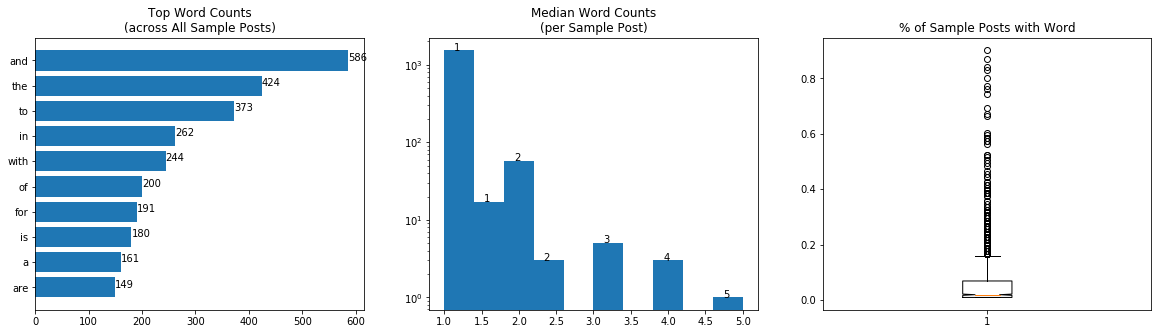

In [419]:
# Plots
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# Column (bar) chart
# Add a title
ax1.set_title("Top Word Counts\n(across All Sample Posts)")

# Plot only a subset of the data
n_bar_samples = 10
bar_plot_df = pw_info_df.sort_values(by=['count_word'], ascending=[False])['count_word'].iloc[0:n_bar_samples]

# Reverse the list so that the descreasing values are plotted from top to bottom
values_bar = list(reversed(bar_plot_df.values))
labels_bar = list(reversed(bar_plot_df.index))

# Create the horizontal bar plot
ax1.barh(labels_bar, values_bar )

# Add a label for each bar providing word count
for i in range(n_bar_samples):
    ax1.text(values_bar[i], labels_bar[i], f"{values_bar[i]:.0f}" )

# Histogram
# Add a title
ax2.set_title("Median Word Counts\n(per Sample Post)")

# Plot the histogram
h_retval = ax2.hist(pw_info_df['median'], log=True)

# Add labels to the histogram bars
n_bins = len(h_retval[0])
n_bin_width = h_retval[1][1] - h_retval[1][0]
for i in range(n_bins):
    if h_retval[0][i] > 0:
        ax2.text(h_retval[1][i]+n_bin_width/3, h_retval[0][i], f"{h_retval[1][i]:.0f}" )

# Boxplot
# Add a title
ax3.set_title("% of Sample Posts with Word")

# Plot the boxplot
b_retval = ax3.boxplot(pw_info_df['%_of_samples'], notch=True)